# **PROJETO: ANÁLISE DE COTAÇÕES DE AÇÕES PARA INVESTIMENTO**

Já pensou em investir em ações na Bolsa de Valores?

Esse projeto de análise tem por objetivo identificar as melhores ações para investimento tendo como base o histórico das cotações dos ativos.

Fonte de dados:
https://br.financas.yahoo.com

# **Importação dos Dados**

In [2]:
import time
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as pd_dr
import matplotlib.pyplot as plt
import seaborn as sns

Importando biblioteca Yahoo Finance.

In [3]:
# Importar biblioteca Yahoo Finance.
import yfinance as yf
yf.pdr_override()

Definindo os ativos a serem analisados: Índice Bovespa, Petrobras, Itaú, BB, Bradesco, Dólar.

In [4]:
# Ativos analisados: Índice Bovespa, Petrobras, Itaú, BB, Bradesco, Dólar.
v_ativos = ['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC4.SA', 'USDBRL=X']
v_ano = '2023'

v_dt_inicio = str(v_ano)+'-01-01'
v_dt_fim = str(v_ano)+'-12-31'

Obtendo cotações.

In [5]:
# Obtendo cotações (importando dados).
df_cotacoes = pd_dr.get_data_yahoo(v_ativos, start = v_dt_inicio, end = v_dt_fim)
df_cotacoes_petro = pd_dr.get_data_yahoo(v_ativos[1], start = v_dt_inicio, end = v_dt_fim)
df_cotacoes_itau = pd_dr.get_data_yahoo(v_ativos[2], start = v_dt_inicio, end = v_dt_fim)
df_cotacoes_bb = pd_dr.get_data_yahoo(v_ativos[3], start = v_dt_inicio, end = v_dt_fim)
df_cotacoes_bradesco = pd_dr.get_data_yahoo(v_ativos[4], start = v_dt_inicio, end = v_dt_fim)
df_cotacoes

[*********************100%%**********************]  6 of 6 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Adj Close                                             \
             BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA  USDBRL=X   
Date                                                               
2023-01-02  30.951469  13.808607  23.598610  18.442509  5.285500   
2023-01-03  30.374496  13.123357  23.107180  17.975815  5.360131   
2023-01-04  30.765347  13.160851  23.174627  18.547112  5.478500   
2023-01-05  32.170540  13.732655  23.897327  19.214970  5.430100   
2023-01-06  32.617226  14.116982  24.311676  19.102318  5.349800   
...               ...        ...        ...        ...       ...   
2023-11-07  51.020000  15.150000  28.980000  34.919998  4.884100   
2023-11-08  51.669998  15.230000  29.110001  34.169998  4.871500   
2023-11-09  49.509998  15.260000  29.240000  34.880001  4.909300   
2023-11-10  50.240002  15.040000  29.590000  34.720001  4.933900   
2023-11-13  50.099998  14.720000  29.330000  35.669998  4.909100   

                               Close                                 ...  \
                    ^BVSP   BBAS3.SA BBDC4.SA   ITUB4.SA   PETR4.SA  ...   
Date                                                                 ...   
2023-01-02  106376.000000  33.259998    14.75  24.490000  22.920000  ...   
2023-01-03  104166.000000  32.639999    14.00  23.980000  22.340000  ...   
2023-01-04  105334.000000  33.060001    14.04  24.049999  23.049999  ...   
2023-01-05  107518.000000  34.570000    14.65  24.799999  23.879999  ...   
2023-01-06  108836.000000  35.049999    15.06  25.230000  23.740000  ...   
...                   ...        ...      ...        ...        ...  ...   
2023-11-07  119268.000000  51.020000    15.15  28.980000  34.919998  ...   
2023-11-08  119099.000000  51.669998    15.23  29.110001  34.169998  ...   
2023-11-09  119012.000000  49.509998    15.26  29.240000  34.880001  ...   
2023-11-10  120636.000000  50.240002    15.04  29.590000  34.720001  ...   
2023-11-13  120449.070312  50.099998    14.72  29.330000  35.669998  ...   

                 Open                                          Volume  \
             ITUB4.SA   PETR4.SA  USDBRL=X          ^BVSP    BBAS3.SA   
Date                                                                    
2023-01-02  24.430000  23.540001  5.285500  109734.000000  11778500.0   
2023-01-03  24.490000  22.940001  5.360131  106377.000000  10773700.0   
2023-01-04  24.059999  21.959999  5.478500  104167.000000   9759500.0   
2023-01-05  24.100000  23.340000  5.430100  105336.000000  16968800.0   
2023-01-06  24.930000  23.940001  5.349800  107642.000000  14752300.0   
...               ...        ...       ...            ...         ...   
2023-11-07  28.190001  35.070000  4.884100  118422.000000  14527500.0   
2023-11-08  29.059999  34.599998  4.871500  119268.000000   9488000.0   
2023-11-09  29.120001  34.500000  4.909300  119180.000000  31213600.0   
2023-11-10  29.420000  34.660000  4.933900  119036.000000   8916200.0   
2023-11-13  29.480000  34.680000  4.914400  120561.179688   1779800.0   

                                                                       
               BBDC4.SA    ITUB4.SA     PETR4.SA USDBRL=X       ^BVSP  
Date                                                                   
2023-01-02   24748300.0  23340700.0   78424700.0        0   8130500.0  
2023-01-03  127764400.0  29873800.0   96750300.0        0  14466700.0  
2023-01-04  153235200.0  29881500.0  129504000.0        0  14451200.0  
2023-01-05  164949200.0  36322800.0   73886000.0        0  15512000.0  
2023-01-06   86788300.0  37628200.0   51851500.0        0  12626600.0  
...                 ...         ...          ...      ...         ...  
2023-11-07   80300200.0  60774300.0   48919900.0        0  16393100.0  
2023-11-08   33468600.0  23697200.0   59742900.0        0  15193500.0  
2023-11-09   45228200.0  25831200.0   56231100.0        0  15568300.0  
2023-11-10   66453700.0  24499000.0   40004800.0        0         0.0  
2023-11-13   16195600.0   5742500.0

# **Tratamento dos Dados**

Excluindo colunas desnecessárias.

In [6]:
# Excluindo colunas
df_cotacoes_petro.drop(columns=['Open','Adj Close','Low','Volume','High'],inplace=True)
df_cotacoes_itau.drop(columns=['Open','Adj Close','Low','Volume','High'],inplace=True)
df_cotacoes_bb.drop(columns=['Open','Adj Close','Low','Volume','High'],inplace=True)
df_cotacoes_bradesco.drop(columns=['Open','Adj Close','Low','Volume','High'],inplace=True)
df_cotacoes_petro



,Close
Date,
2023-01-02,22.920000
2023-01-03,22.340000
2023-01-04,23.049999
2023-01-05,23.879999
2023-01-06,23.740000
...,...
2023-11-07,34.919998
2023-11-08,34.169998
2023-11-09,34.880001


In [7]:
df_cotacoes_petro.dtypes


Close    float64
dtype: object

Removendo valores nulos.

In [8]:
# Removendo valores nulos.
df_cotacoes_petro = df_cotacoes_petro.loc[df_cotacoes_petro.Close.notnull()]
df_cotacoes_itau = df_cotacoes_itau.loc[df_cotacoes_itau.Close.notnull()]
df_cotacoes_bb = df_cotacoes_bb.loc[df_cotacoes_bb.Close.notnull()]
df_cotacoes_bradesco = df_cotacoes_bradesco.loc[df_cotacoes_bradesco.Close.notnull()]
df_cotacoes_itau

,Close
Date,
2023-01-02,24.490000
2023-01-03,23.980000
2023-01-04,24.049999
2023-01-05,24.799999
2023-01-06,25.230000
...,...
2023-11-07,28.980000
2023-11-08,29.110001
2023-11-09,29.240000


# **Análise Gráfica**

Analisando os preços.

Text(0.5, 1.0, 'Análise de Tendência - Petrobras')

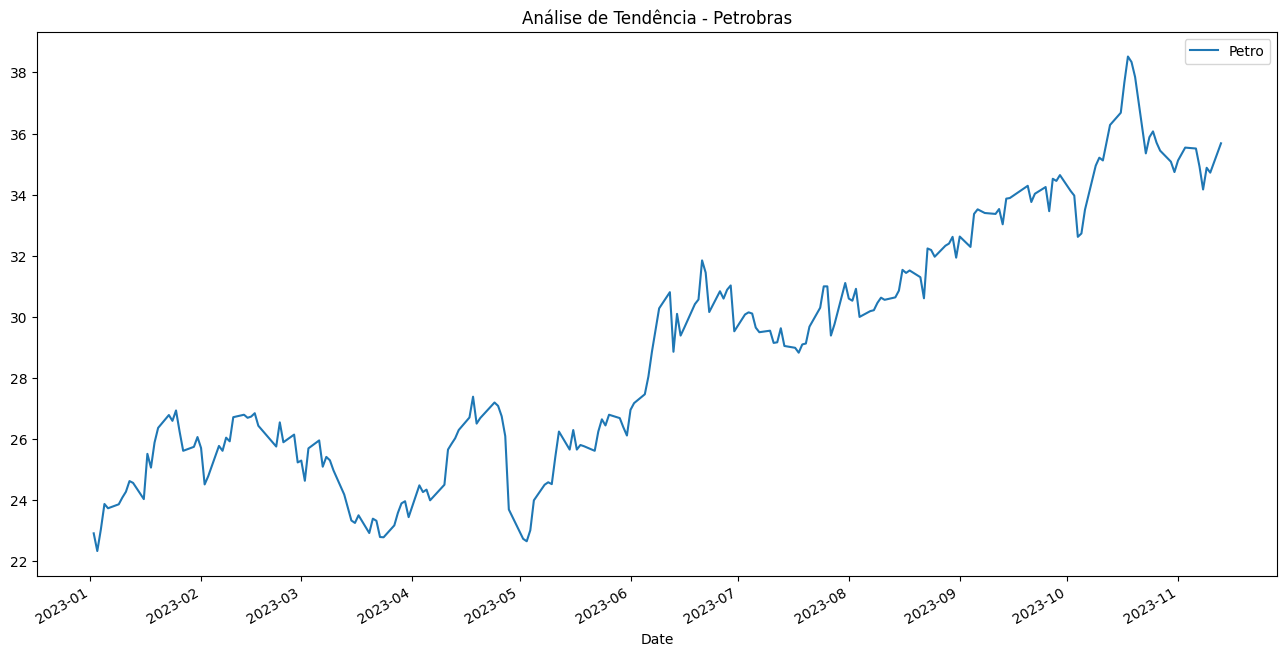

In [9]:
# Analisando os preços por ativo.

# Gerando o gráfico.
df_cotacoes_petro['Close'].plot(legend=True, label='Petro', figsize = (16, 8))

plt.title("Análise de Tendência - Petrobras")

Text(0.5, 1.0, 'Análise de Preços')

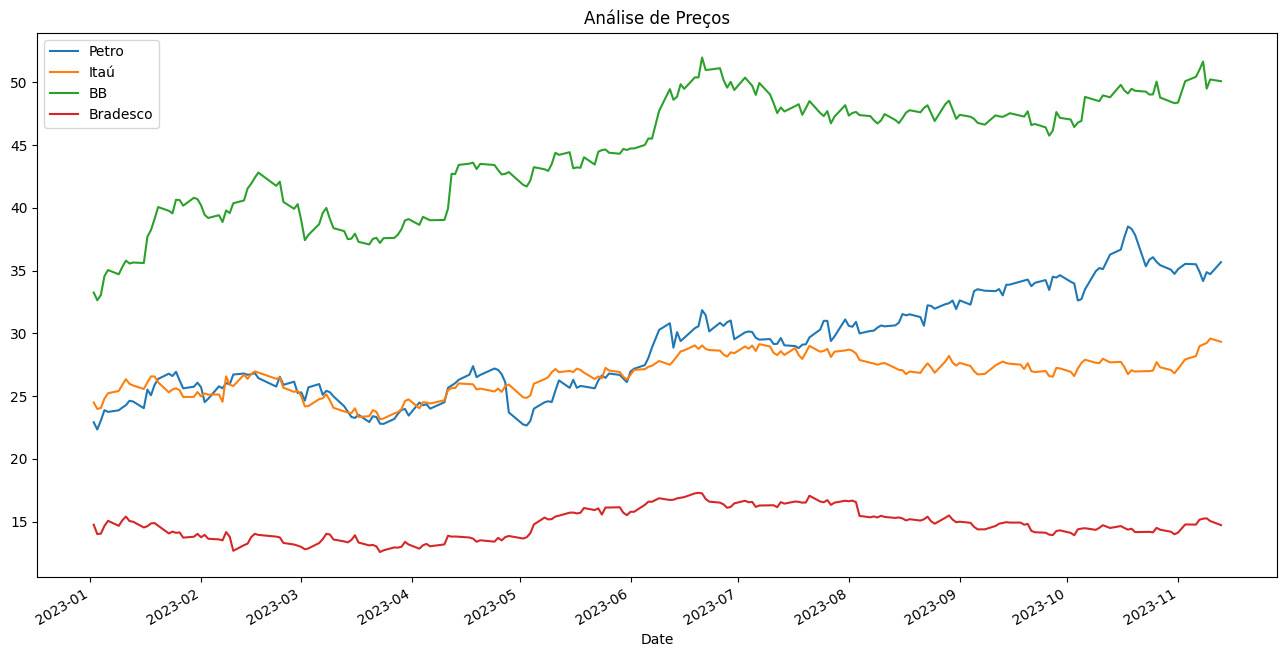

In [18]:
# Gerando o gráfico para análise de preços de todos os ativos.
df_cotacoes_petro['Close'].plot(legend=True, label='Petro', figsize = (16, 8))
df_cotacoes_itau['Close'].plot(legend=True, label='Itaú', figsize = (16, 8))
df_cotacoes_bb['Close'].plot(legend=True, label='BB', figsize = (16, 8))
df_cotacoes_bradesco['Close'].plot(legend=True, label='Bradesco', figsize = (16, 8))

plt.title("Análise de Preços")

As médias móveis indicam a direção a tendência, sendo a média móvel de 20 períodos a que melhor representa esse comportamento.
Analisando a MM20 no gráfico abaixo, observamos que a inclinação da média para baixo sugere venda, enquanto a inclinação para cima sugere compra do ativo.

Text(0.5, 1.0, 'Análise de Tendência - Petrobras')

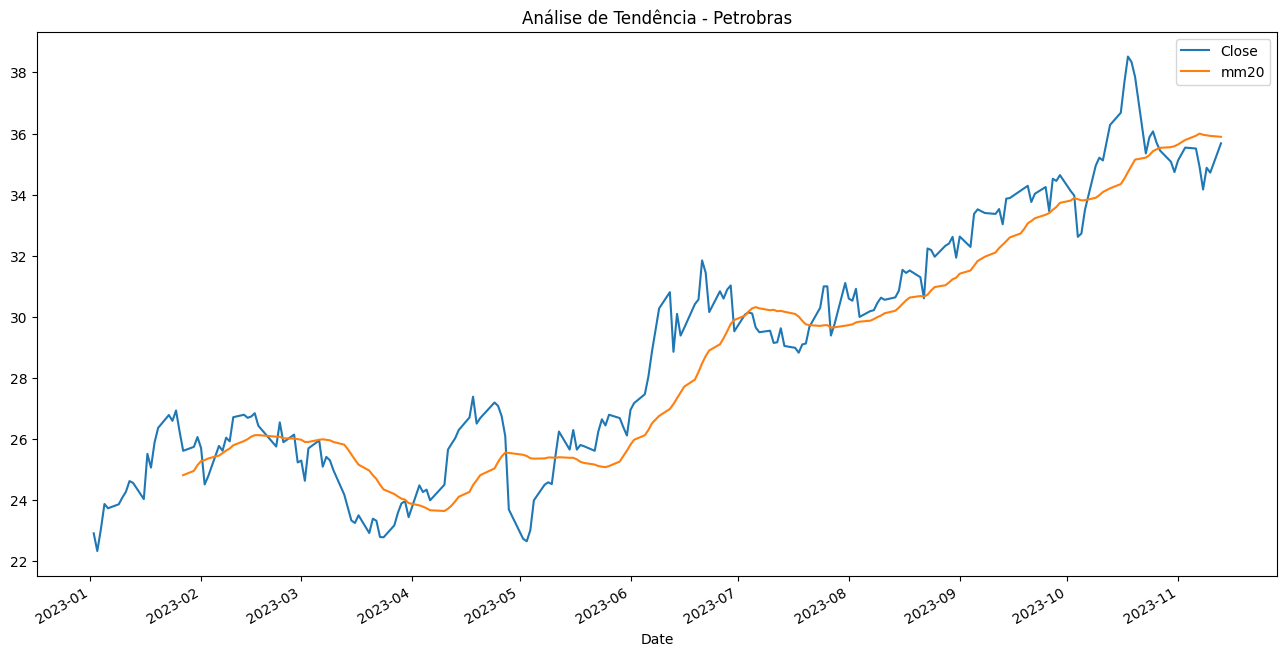

In [22]:
# Médias Móveis
# Criando coluna para calcular e armazenar a média móvel.
df_cotacoes_petro['mm20'] = df_cotacoes_petro['Close'].rolling(20).mean()
df_cotacoes_itau['mm20'] = df_cotacoes_itau['Close'].rolling(20).mean()
df_cotacoes_bb['mm20'] = df_cotacoes_bb['Close'].rolling(20).mean()
df_cotacoes_bradesco['mm20'] = df_cotacoes_bradesco['Close'].rolling(20).mean()

df_cotacoes_petro[['Close', 'mm20']].plot(legend=True, label='Petro', figsize = (16, 8))
plt.title("Análise de Tendência - Petrobras")

Text(0.5, 1.0, 'Análise de Tendência - Itaú')

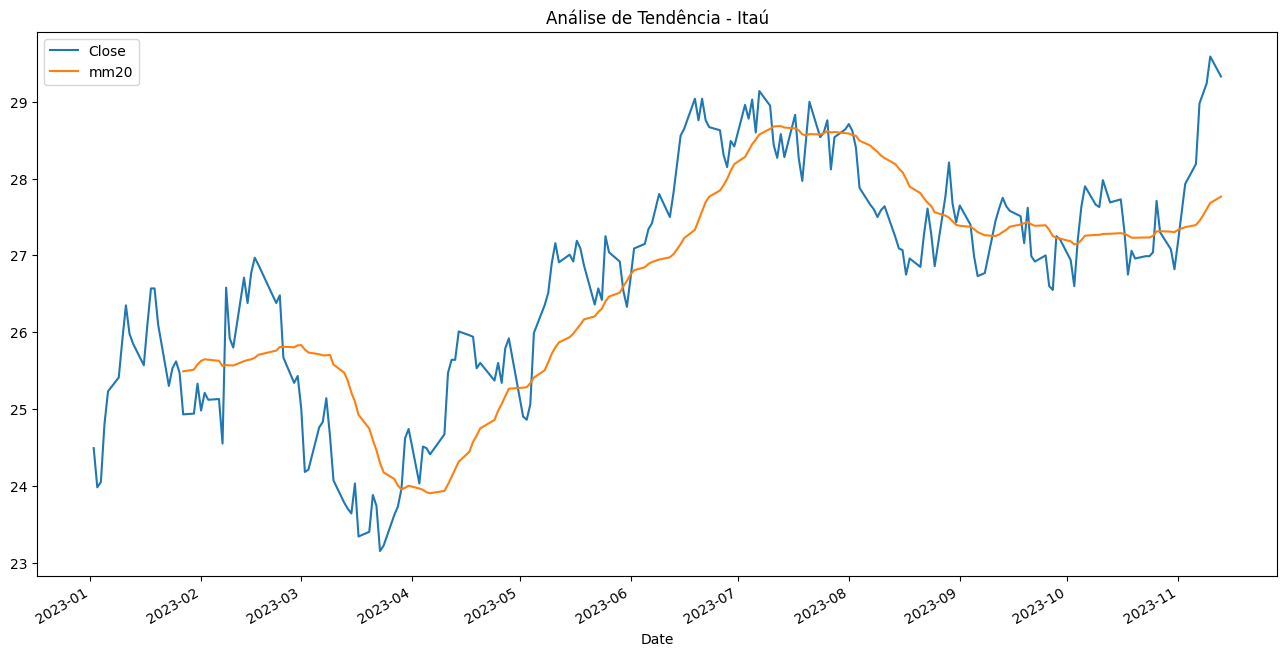

In [19]:
df_cotacoes_itau[['Close', 'mm20']].plot(legend=True, label='Itau', figsize = (16, 8))
plt.title("Análise de Tendência - Itaú")

Text(0.5, 1.0, 'Análise de Tendência - BB')

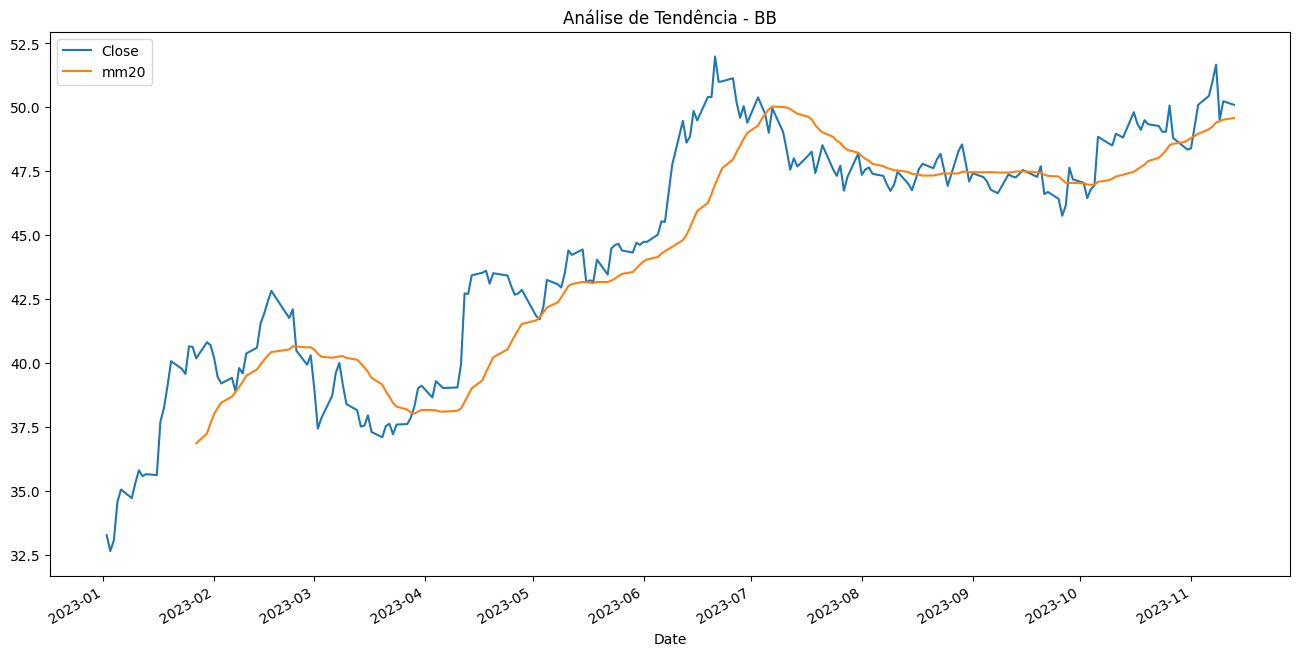

In [20]:
df_cotacoes_bb[['Close', 'mm20']].plot(legend=True, label='BB', figsize = (16, 8))
plt.title("Análise de Tendência - BB")

Text(0.5, 1.0, 'Análise de Tendência - Bradesco')

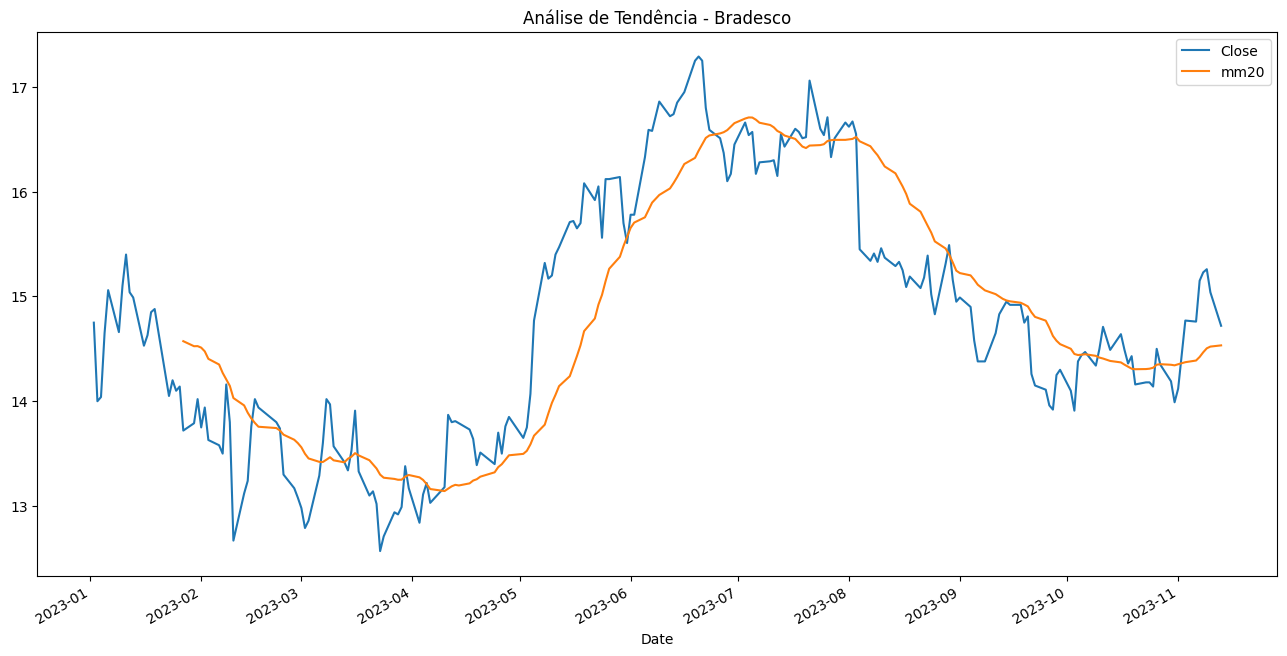

In [21]:
df_cotacoes_bradesco[['Close', 'mm20']].plot(legend=True, label='Bradesco', figsize = (16, 8))
plt.title("Análise de Tendência - Bradesco")

Analisando a variação diária nos preços.

Text(0.5, 1.0, 'Análise de Variação no Preço - Petrobras')

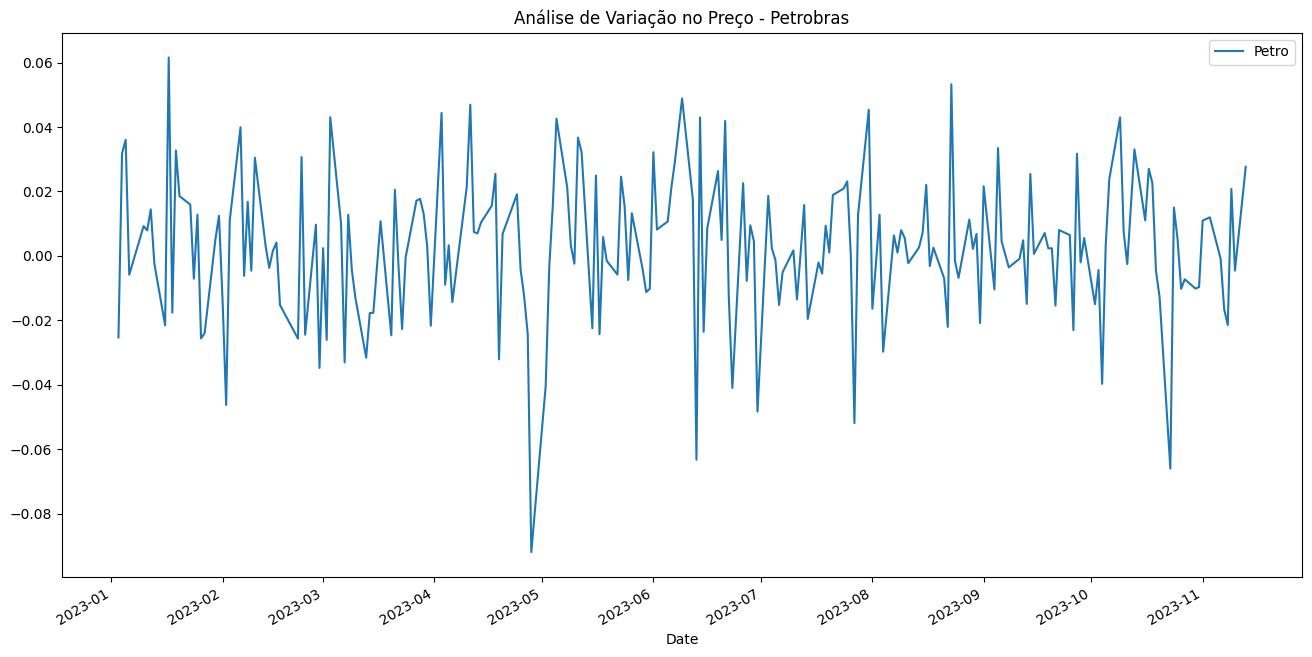

In [26]:
# Variação diária no preço
# Criando coluna para calcular e armazenar a variação.
df_cotacoes_petro['variacao_diaria'] = df_cotacoes_petro['Close'].pct_change()
df_cotacoes_itau['variacao_diaria'] = df_cotacoes_itau['Close'].pct_change()
df_cotacoes_bb['variacao_diaria'] = df_cotacoes_bb['Close'].pct_change()
df_cotacoes_bradesco['variacao_diaria'] = df_cotacoes_bradesco['Close'].pct_change()

df_cotacoes_petro['variacao_diaria'].plot(legend=True, label='Petro', figsize = (16, 8))
plt.title("Análise de Variação no Preço - Petrobras")

Text(0.5, 1.0, 'Análise de Variação no Preço - Itau')

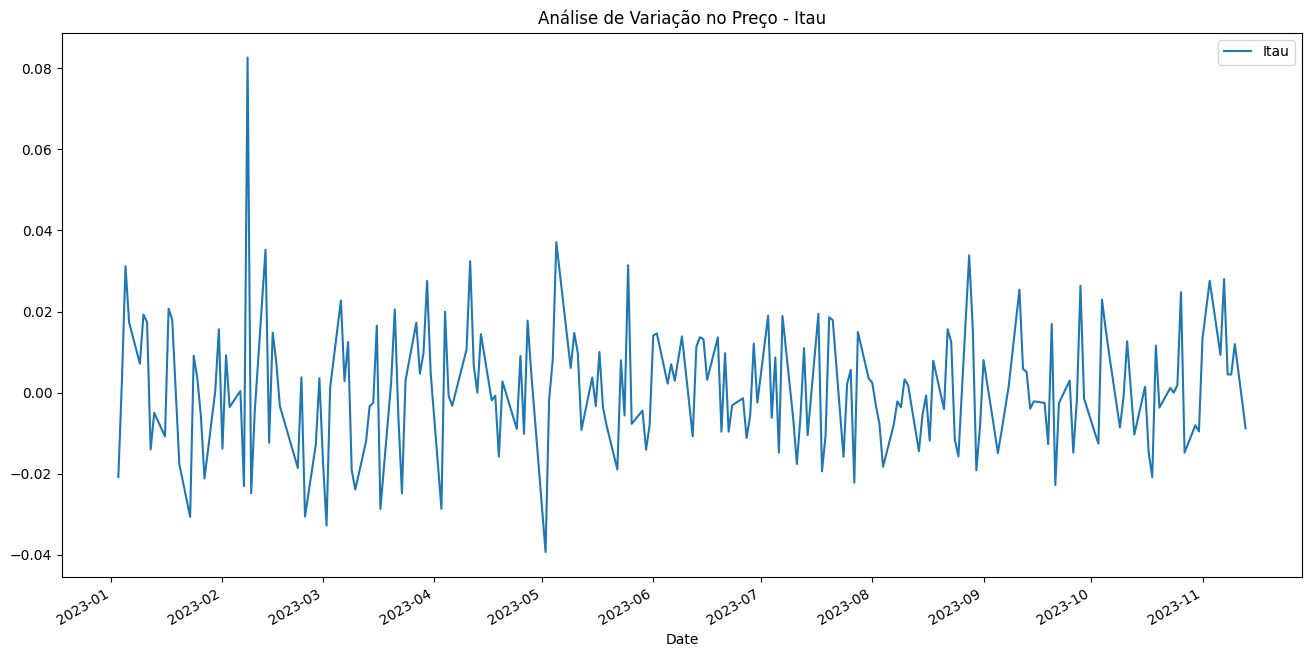

In [23]:
df_cotacoes_itau['variacao_diaria'].plot(legend=True, label='Itau', figsize = (16, 8))
plt.title("Análise de Variação no Preço - Itau")

Text(0.5, 1.0, 'Análise de Variação no Preço - BB')

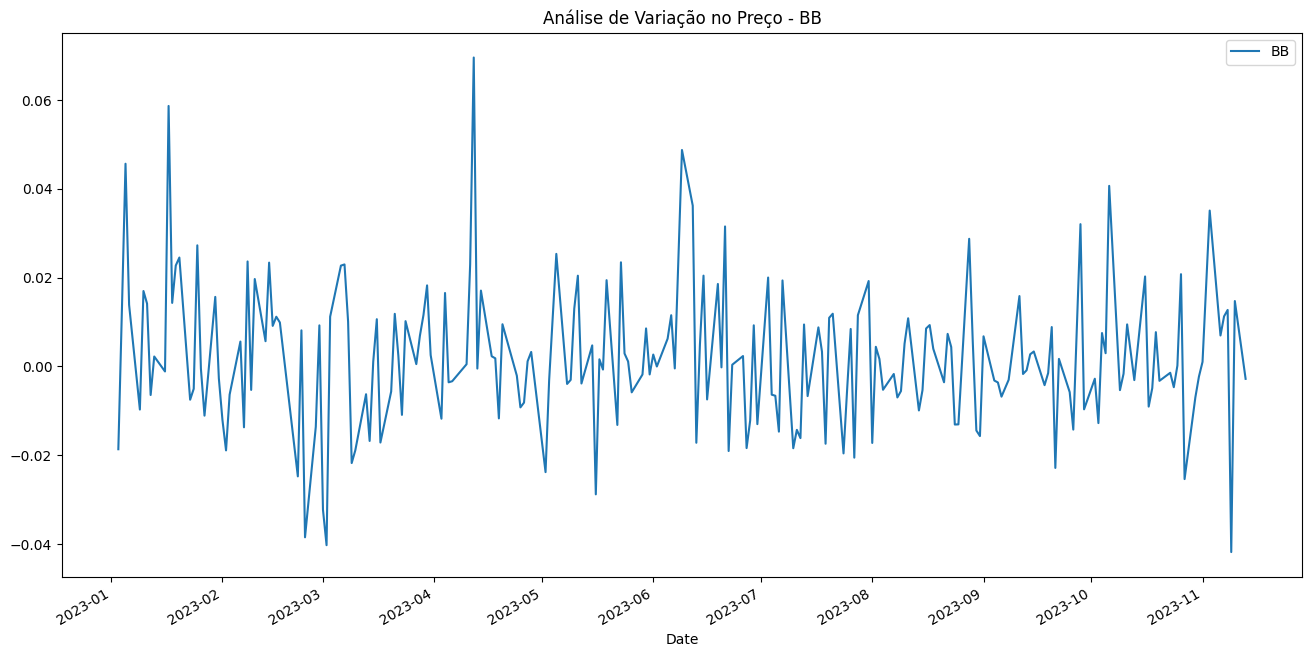

In [24]:
df_cotacoes_bb['variacao_diaria'].plot(legend=True, label='BB', figsize = (16, 8))
plt.title("Análise de Variação no Preço - BB")

Text(0.5, 1.0, 'Análise de Variação no Preço - Bradesco')

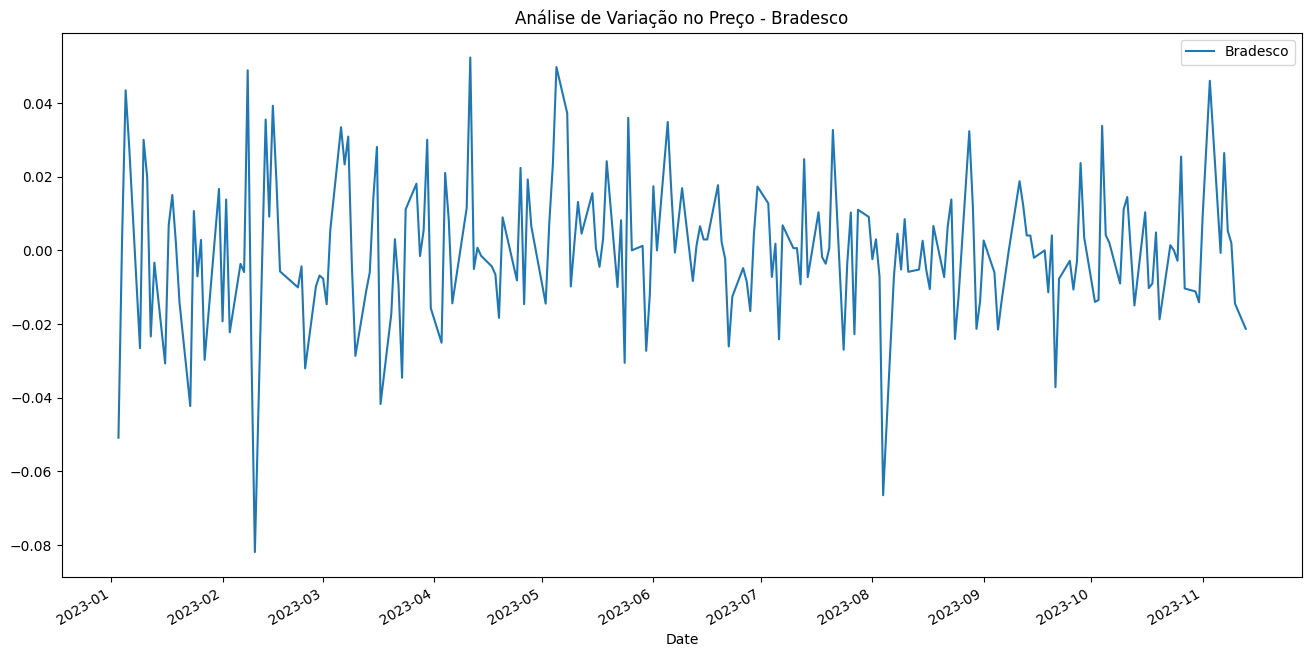

In [25]:
df_cotacoes_bradesco['variacao_diaria'].plot(legend=True, label='Bradesco', figsize = (16, 8))
plt.title("Análise de Variação no Preço - Bradesco")

Analisando a Distribuição das cotações.

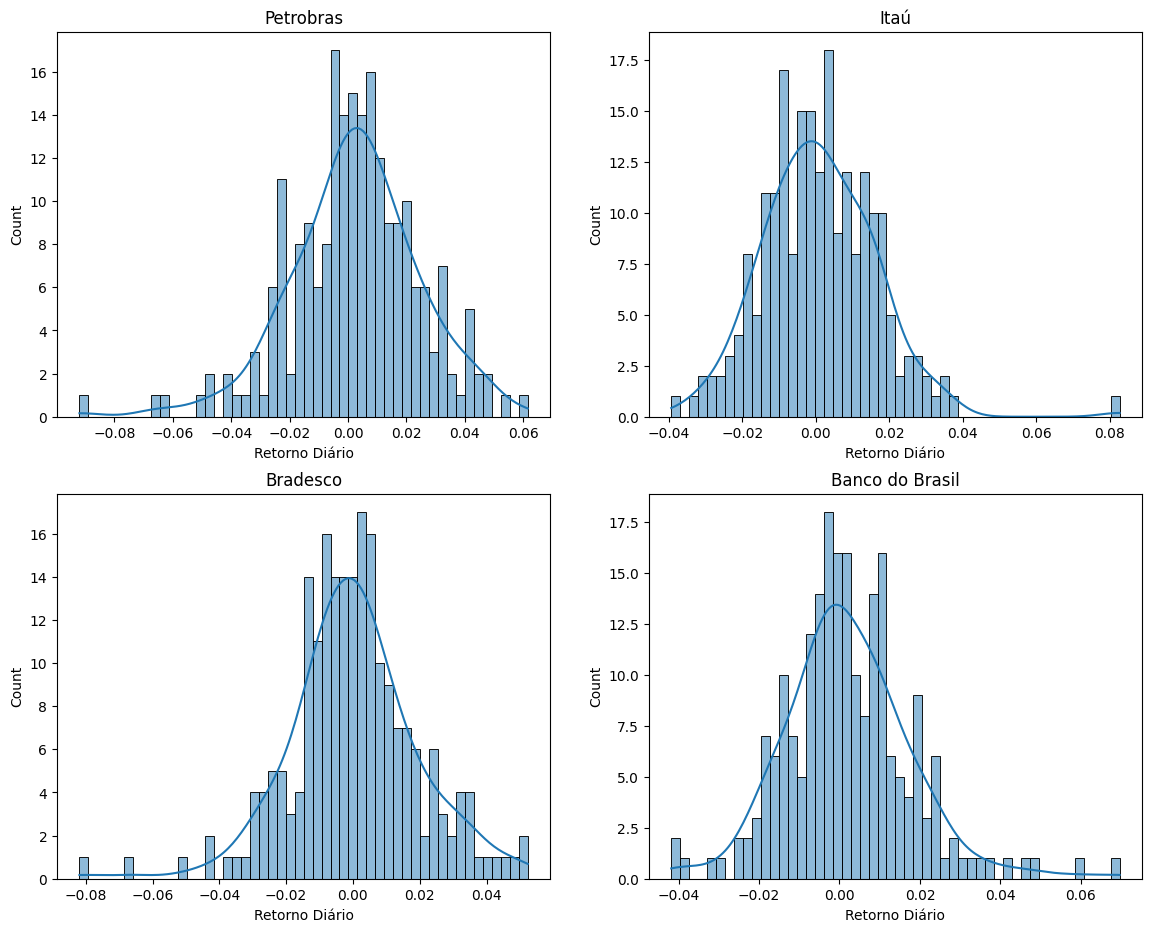

In [13]:
# Análise de Distribuição
fig, axes = plt.subplots(2, 2, figsize = (14, 11))
#fig.suptitle('Probabilidade de Retorno')

grafico = sns.histplot(df_cotacoes_petro['variacao_diaria'], bins=50, kde = True, ax = axes[0,0])
grafico.set(xlabel='Retorno Diário', title='Petrobras')
grafico = sns.histplot(df_cotacoes_itau['variacao_diaria'], bins=50, kde = True, ax = axes[0,1])
grafico.set(xlabel='Retorno Diário', title='Itaú')
grafico = sns.histplot(df_cotacoes_bradesco['variacao_diaria'], bins=50, kde = True, ax = axes[1,0])
grafico.set(xlabel='Retorno Diário', title='Bradesco')
grafico = sns.histplot(df_cotacoes_bb['variacao_diaria'], bins=50, kde = True, ax = axes[1,1])
grafico.set(xlabel='Retorno Diário', title='Banco do Brasil')

plt.show()


No gráfico acima observamos que os valores dentro da normalidade estão compreendidos abaixo da linha azul (curva normal) de cada gráfico.
Já os valores muito extremos (distantes da curva normal) podem ser "outliers", ou seja, dados discrepantes.

Analisando as correlações através da Matriz de Dispersão:
- Na diagonal é possível ver a variação de preços de cada ativo.
- Fora da diagonal é possível ver como as ações se correlacionam entre si.

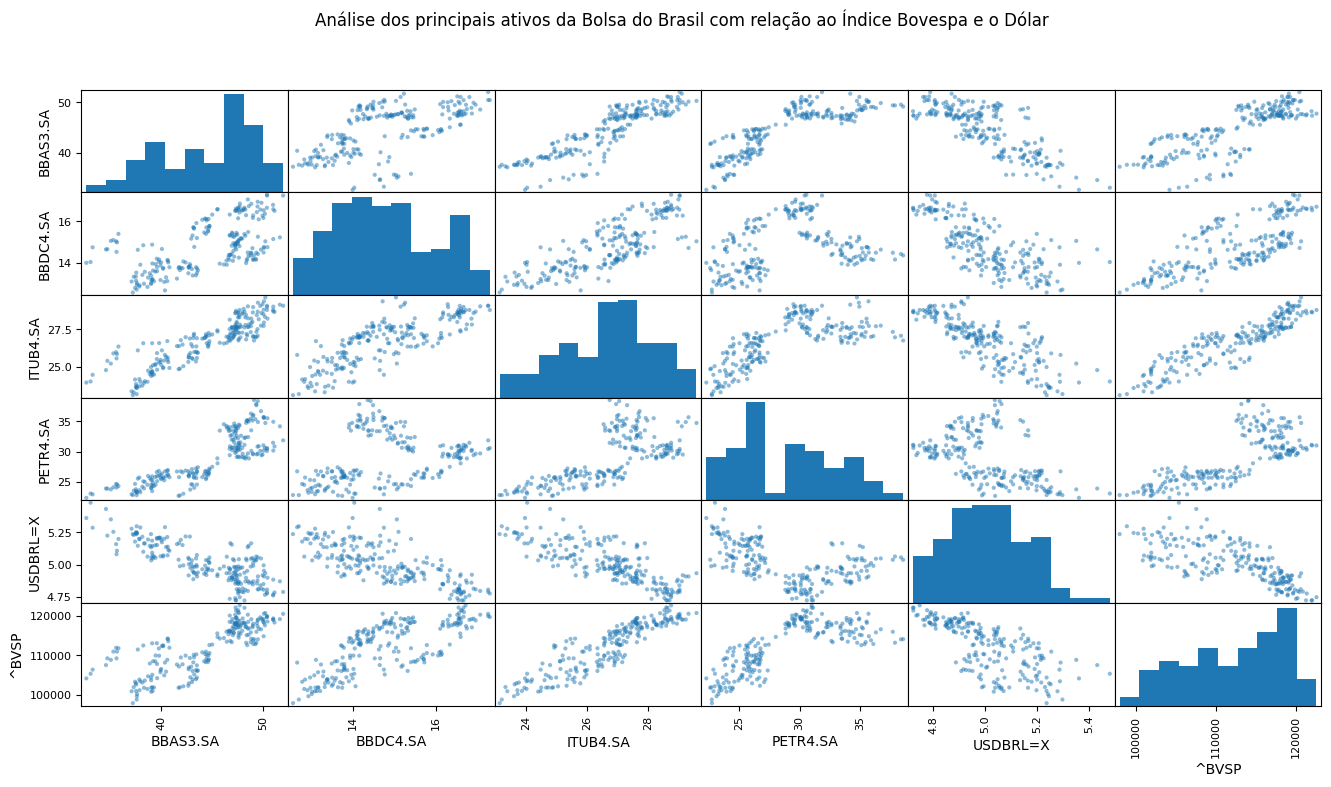

In [14]:
# Gráfico: Matriz de Dispersão
# - Na diagonal é possível ver a variação de preços de cada ativo.
# - Fora da diagonal é possível ver como as ações se correlacionam entre si.
from pandas.plotting import scatter_matrix
grafico = scatter_matrix(df_cotacoes['Close'], figsize = (16, 8))
plt.suptitle('Análise dos principais ativos da Bolsa do Brasil com relação ao Índice Bovespa e o Dólar')
plt.show()

Verificando a correlação entre os ativos.

In [15]:
# Verificando a correlação entre os ativos.
df_cotacoes['Close'].corr().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,BBAS3.SA,BBDC4.SA,ITUB4.SA,PETR4.SA,USDBRL=X,^BVSP
BBAS3.SA,1.000000,0.619548,0.880462,0.836378,-0.801548,0.799653
BBDC4.SA,0.619548,1.000000,0.803454,0.305921,-0.744205,0.747310
ITUB4.SA,0.880462,0.803454,1.000000,0.698374,-0.793336,0.904134
PETR4.SA,0.836378,0.305921,0.698374,1.000000,-0.500455,0.750322
USDBRL=X,-0.801548,-0.744205,-0.793336,-0.500455,1.000000,-0.718084
^BVSP,0.799653,0.747310,0.904134,0.750322,-0.718084,1.000000


Resultados da Análise:

1. Analisando a tabela acima, observamos uma correlação positiva muito forte (acima de 0.9) entre o Índice Bovespa (BVSP) e o Itaú (ITUB4.SA), o que indica que altas nas ações do Itaú podem sugerir altas também no Índice Bovespa.

2. Podemos observar também correlações positivas fortes (entre 0.7 e 0.9) entre o Índice Bovespa (BVSP) e Petrobras (PETR4.SA), Bradesco (BBDC4.SA) e BB (BBAS3.SA), sugerindo que a alta em qualquer um dos últimos 3 ativos pode levar a altas no Índice Bovespa.

3. Pode-se verificar também uma correlação negativa forte (menor que -0.9) entre o Índice Bovespa, as ações das empresas (Itaú, Bradesco e BB) e o dólar. É possível observar que altas na cotação do dólar levam à quedas nas cotações tanto do Índice Bovespa quanto das ações das empresas citadas. Por outro lado, quedas no dólar podem gerar altas tanto no Índice quanto nas empresa.

Obs: as classificações das correlações foram realizadas de acordo com o "Coeficiente de correlação de Pearson".


Realizando a análise de Risco X Retorno para cada ativo.

In [16]:
# Análise Risco X Retorno
retorno_petro = df_cotacoes_petro.variacao_diaria.mean()
risco_petro = df_cotacoes_petro.variacao_diaria.std()

retorno_itau = df_cotacoes_itau.variacao_diaria.mean()
risco_itau = df_cotacoes_itau.variacao_diaria.std()

retorno_bradesco = df_cotacoes_bradesco.variacao_diaria.mean()
risco_bradesco = df_cotacoes_bradesco.variacao_diaria.std()

retorno_bb = df_cotacoes_bb.variacao_diaria.mean()
risco_bb = df_cotacoes_bb.variacao_diaria.std()

print(retorno_bb, risco_bb)


0.0020227048675901275 0.015865234824739605


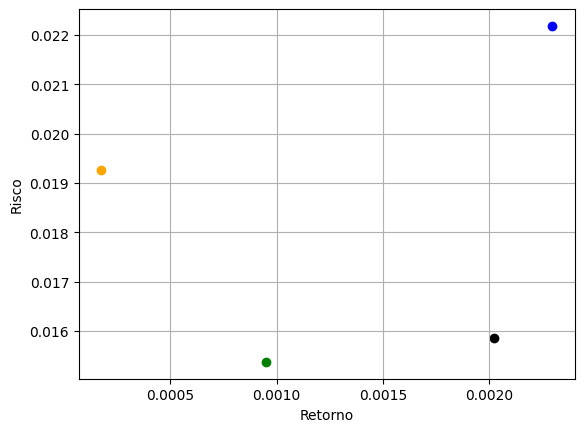

In [17]:
plt.grid()
plt.xlabel('Retorno')
plt.ylabel('Risco')
plt.scatter(retorno_petro, risco_petro, color='blue')
plt.scatter(retorno_itau, risco_itau, color='green')
plt.scatter(retorno_bradesco, risco_bradesco, color='orange')
plt.scatter(retorno_bb, risco_bb, color='black')


Resultado da Análise:

De acordo com o gráfico acima, percebemos que Itaú (verde) e BB (preto) são os melhores ativos para se investir, pois apresentam o menores riscos e o maiores retornos.

Já Bradesco (laranja) e Petrobras (azul) não apresentam relações "risco x retorno" tão interessantes que justifiquem um investimento no momento.